Load the data:

In [223]:
strikes <- read.csv('strikes_clean.csv')

A quick peek at the data...

In [95]:
summary(strikes)

      Country         Year          Strike           Unemp       
 Australia: 35   Min.   :1951   Min.   :   0.0   Min.   : 0.000  
 Austria  : 35   1st Qu.:1959   1st Qu.:  22.0   1st Qu.: 1.200  
 Canada   : 35   Median :1968   Median : 129.0   Median : 2.500  
 Denmark  : 35   Mean   :1968   Mean   : 302.3   Mean   : 3.555  
 Finland  : 35   3rd Qu.:1977   3rd Qu.: 362.0   3rd Qu.: 5.500  
 France   : 35   Max.   :1985   Max.   :7000.0   Max.   :17.000  
 (Other)  :415                                                   
      Infl             Demo           Centr            Dens      
 Min.   :-2.900   Min.   : 8.16   Min.   :0.000   Min.   :15.10  
 1st Qu.: 2.700   1st Qu.:32.20   1st Qu.:0.250   1st Qu.:33.90  
 Median : 4.800   Median :42.50   Median :0.375   Median :43.50  
 Mean   : 5.957   Mean   :40.85   Mean   :0.456   Mean   :45.69  
 3rd Qu.: 8.200   3rd Qu.:49.70   3rd Qu.:0.750   3rd Qu.:57.20  
 Max.   :27.500   Max.   :78.70   Max.   :1.000   Max.   :91.50  
          

In [96]:
head(strikes)

Country,Year,Strike,Unemp,Infl,Demo,Centr,Dens
Australia,1951,296,1.3,19.8,43.0,0.375,56.8
Australia,1952,397,2.2,17.2,43.0,0.375,55.4
Australia,1953,360,2.5,4.3,43.0,0.375,56.9
Australia,1954,300,1.7,0.7,47.0,0.375,58.6
Australia,1955,326,1.4,2.0,38.5,0.375,57.6
Australia,1956,352,1.8,6.3,38.5,0.375,56.6


# Variable Transformation

A quick pairs plot shows that 'Strike' should be logged (omitted to save memory)

In [97]:
# pairs(~ Strike + Unemp + Infl + Demo + Centr + Dens, data=strikes)

We can verify a multiplicative model through a quick look at the residuals of a simple model:

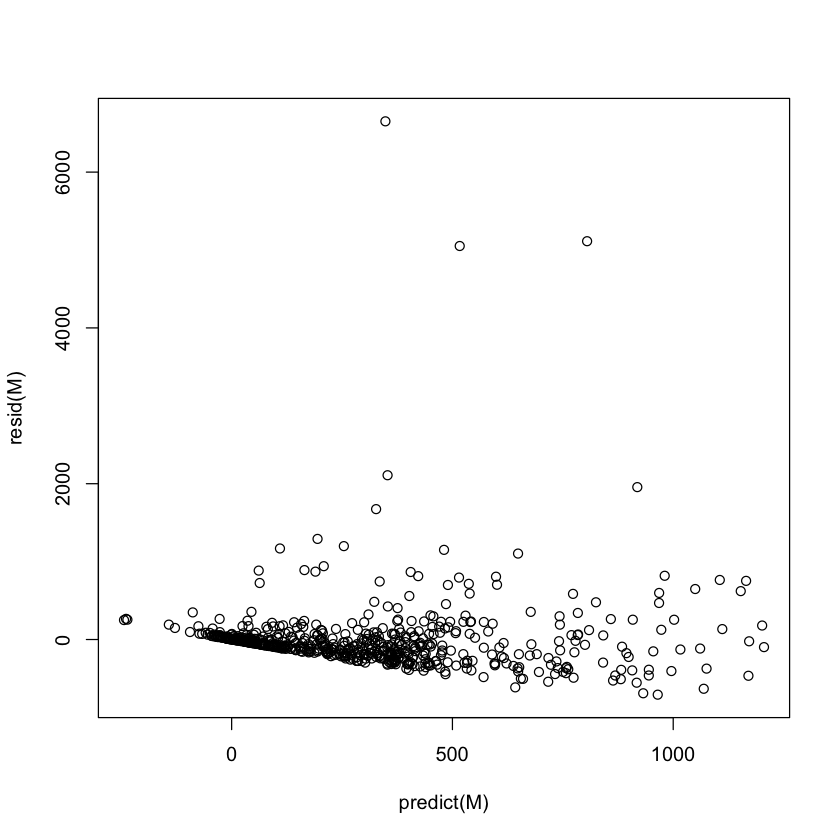

In [225]:
M <- lm(Strike ~., data=strikes)
plot(predict(M), resid(M))

We take log(x+1) to work around the 0 values. We also apply the same transformations to Unemp.

In [227]:
strikes[,'Strike'] <- log(strikes[,'Strike'] + 1)
strikes[,'Unemp'] <- log(strikes[,'Unemp'] + 1)

Transformed data:

In [123]:
head(strikes)

Country,Year,Strike,Unemp,Infl,Demo,Centr,Dens
Australia,1951,5.693732,0.8329091,19.8,43.0,0.375,56.8
Australia,1952,5.986452,1.1631508,17.2,43.0,0.375,55.4
Australia,1953,5.888878,1.2527630,4.3,43.0,0.375,56.9
Australia,1954,5.707110,0.9932518,0.7,47.0,0.375,58.6
Australia,1955,5.789960,0.8754687,2.0,38.5,0.375,57.6
Australia,1956,5.866468,1.0296194,6.3,38.5,0.375,56.6


# Manual Model Building

We look at the main effects model to get a sense for the data. We find that Centr is dependent on the other covariates.

In [228]:
M <- lm(Strike ~ . -1, data=strikes)
summary(M)


Call:
lm(formula = Strike ~ . - 1, data = strikes)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0559 -0.6671 -0.0206  0.6014  4.2217 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
CountryAustralia     58.151103  10.857180   5.356 1.21e-07 ***
CountryAustria       54.529092  10.864481   5.019 6.85e-07 ***
CountryBelgium       57.644309  10.852229   5.312 1.53e-07 ***
CountryCanada        59.404172  10.861971   5.469 6.64e-08 ***
CountryDenmark       55.509800  10.831354   5.125 4.02e-07 ***
CountryFinland       57.546899  10.870494   5.294 1.68e-07 ***
CountryFrance        58.688564  10.895484   5.387 1.03e-07 ***
CountryGermany       55.800275  10.892262   5.123 4.06e-07 ***
CountryIreland       58.356350  10.826145   5.390 1.01e-07 ***
CountryItaly         59.275223  10.832375   5.472 6.53e-08 ***
CountryJapan         57.759539  10.901741   5.298 1.64e-07 ***
CountryNetherlands   55.595319  10.884707 

We consider the main effects model and an interpretable interaction, and run an F-test on the Categorical interaction Country*Dens.

In [229]:
M1 <- lm(Strike ~Country +  Year + Unemp + Infl + Demo +Dens - 1, data=strikes)
M2 <- lm(Strike ~Country +  Year + Unemp + Infl + Demo + Country:Dens -1, data=strikes)
anova(M1, M2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
602,738.5003,NA,NA,NA,NA
585,657.8421,17,80.6581,4.219231,3.87844e-08


We check to see if another similar interaction Country*Demo is valuable, but find that it fails the F-test.

In [230]:
M3 <- lm(Strike ~ Country + Year + Unemp + Infl + Country:Dens + Country:Demo -1, data=strikes)
anova(M2, M3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
585,657.8421,NA,NA,NA,NA
568,630.7350,17,27.10718,1.435942,0.1137196


Our next model  includes an additional interaction Infl:Dens. We see that the p-value shows that it is significant.

In [243]:
M4 <- lm(Strike ~ Country + Year + Unemp + Infl + Demo + Infl:Dens + Country:Dens-1, data=strikes)
summary(M4)


Call:
lm(formula = Strike ~ Country + Year + Unemp + Infl + Demo + 
    Infl:Dens + Country:Dens - 1, data = strikes)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9080 -0.6447 -0.0712  0.5398  4.1646 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
CountryAustralia          33.2725414 14.1610417   2.350  0.01913 *  
CountryAustria             1.6341864 16.7446811   0.098  0.92229    
CountryBelgium            33.2239280 13.8689582   2.396  0.01691 *  
CountryCanada             30.1823003 13.8959735   2.172  0.03026 *  
CountryDenmark            26.3317427 13.7594459   1.914  0.05614 .  
CountryFinland            32.4170988 14.0184555   2.312  0.02110 *  
CountryFrance             30.8150619 14.4219717   2.137  0.03304 *  
CountryGermany            34.7099731 14.7953932   2.346  0.01931 *  
CountryIreland            31.1271351 13.6988166   2.272  0.02343 *  
CountryItaly              35.4588120 14.0202990   2.529  0.01170 *  
CountryJapan 

We consider adding in a square term, but it has no significance.

In [251]:
M5 <- lm(Strike ~ Country + Year + Unemp + Infl + Infl:Dens + Country:Dens-1 + Demo + I(Demo^2), data=strikes)
anova(M4, M5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
585,654.7296,NA,NA,NA,NA
584,654.7229,1,0.006695668,0.005972405,0.9384262


# Automated Selection

Our minimum model is the intercept, maximal contains additional interactions and squared terms.

In [218]:
M0 <- lm(Strike ~1, strikes)
Mfull <- lm(Strike ~ Country + Year + (. - Country - Year - Centr)^2 + I(Demo^2) + I(Dens^2) + I(Unemp^2) + Country:Demo + Country:Dens, data=strikes)
Mstart <- lm(Strike ~ .-Centr, data=strikes)
Mback <- step(object = Mfull, scope = list(lower = M0, upper = Mfull),
                direction = "backward", trace = FALSE)
Mstep <- step(object = Mstart, scope = list(lower = M0, upper = Mfull),
                direction = "both", trace = FALSE)

We are interested in Mback since we know it leads to the best model.

In [246]:
summary(Mback)


Call:
lm(formula = Strike ~ Country + Year + Unemp + Infl + Dens + 
    I(Unemp^2) + Unemp:Infl + Infl:Dens + Country:Dens, data = strikes)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9044 -0.6606 -0.0467  0.5068  4.0812 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.653e+01  1.643e+01   2.831 0.004800 ** 
CountryAustria            -3.773e+01  6.573e+00  -5.741 1.52e-08 ***
CountryBelgium            -7.753e+00  4.780e+00  -1.622 0.105394    
CountryCanada             -1.228e+01  5.099e+00  -2.408 0.016359 *  
CountryDenmark            -1.484e+01  4.851e+00  -3.060 0.002315 ** 
CountryFinland            -8.025e+00  4.564e+00  -1.758 0.079230 .  
CountryFrance             -8.574e+00  4.588e+00  -1.869 0.062166 .  
CountryGermany            -4.862e+00  8.032e+00  -0.605 0.545219    
CountryIreland            -1.060e+01  4.972e+00  -2.132 0.033412 *  
CountryItaly              -6.146e+00  4.650e+00  -1.322 0.18